In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
athletes = pd.read_csv("new_athlete.csv").dropna()
athletes.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight
0,0,A Dijiang,M,24.0,180.0,80.0
1,1,A Lamusi,M,23.0,170.0,60.0
4,4,Christine Jacoba Aaftink,F,21.0,185.0,82.0
5,10,Per Knut Aaland,M,31.0,188.0,75.0
6,18,John Aalberg,M,31.0,183.0,72.0


In [34]:
man_H = athletes[athletes["Sex"] == "M"]["Height"]
man_W = athletes[athletes["Sex"] == "M"]["Weight"]
man_H_mean = man_H.mean()
man_W_mean = man_W.mean()
man_H.head(), man_W.head()

(0    180.0
 1    170.0
 5    188.0
 6    183.0
 8    186.0
 Name: Height, dtype: float64,
 0    80.0
 1    60.0
 5    75.0
 6    72.0
 8    96.0
 Name: Weight, dtype: float64)

In [42]:
female_H = athletes[athletes["Sex"] == "F"]["Height"]
female_W = athletes[athletes["Sex"] == "F"]["Weight"]
female_H_mean = female_H.mean()
female_W_mean = female_W.mean()

In [76]:
#线性回归
from sklearn.linear_model import LinearRegression
model_man = LinearRegression()
model_man.fit(man_H.values.reshape(-1,1), man_W)
predict_man_W = model_man.predict(man_H.values.reshape(-1,1))

model_female = LinearRegression()
model_female.fit(female_H.values.reshape(len(female_H.values),1), female_W)
predict_female_W = model_female.predict(female_H.values.reshape(-1,1))

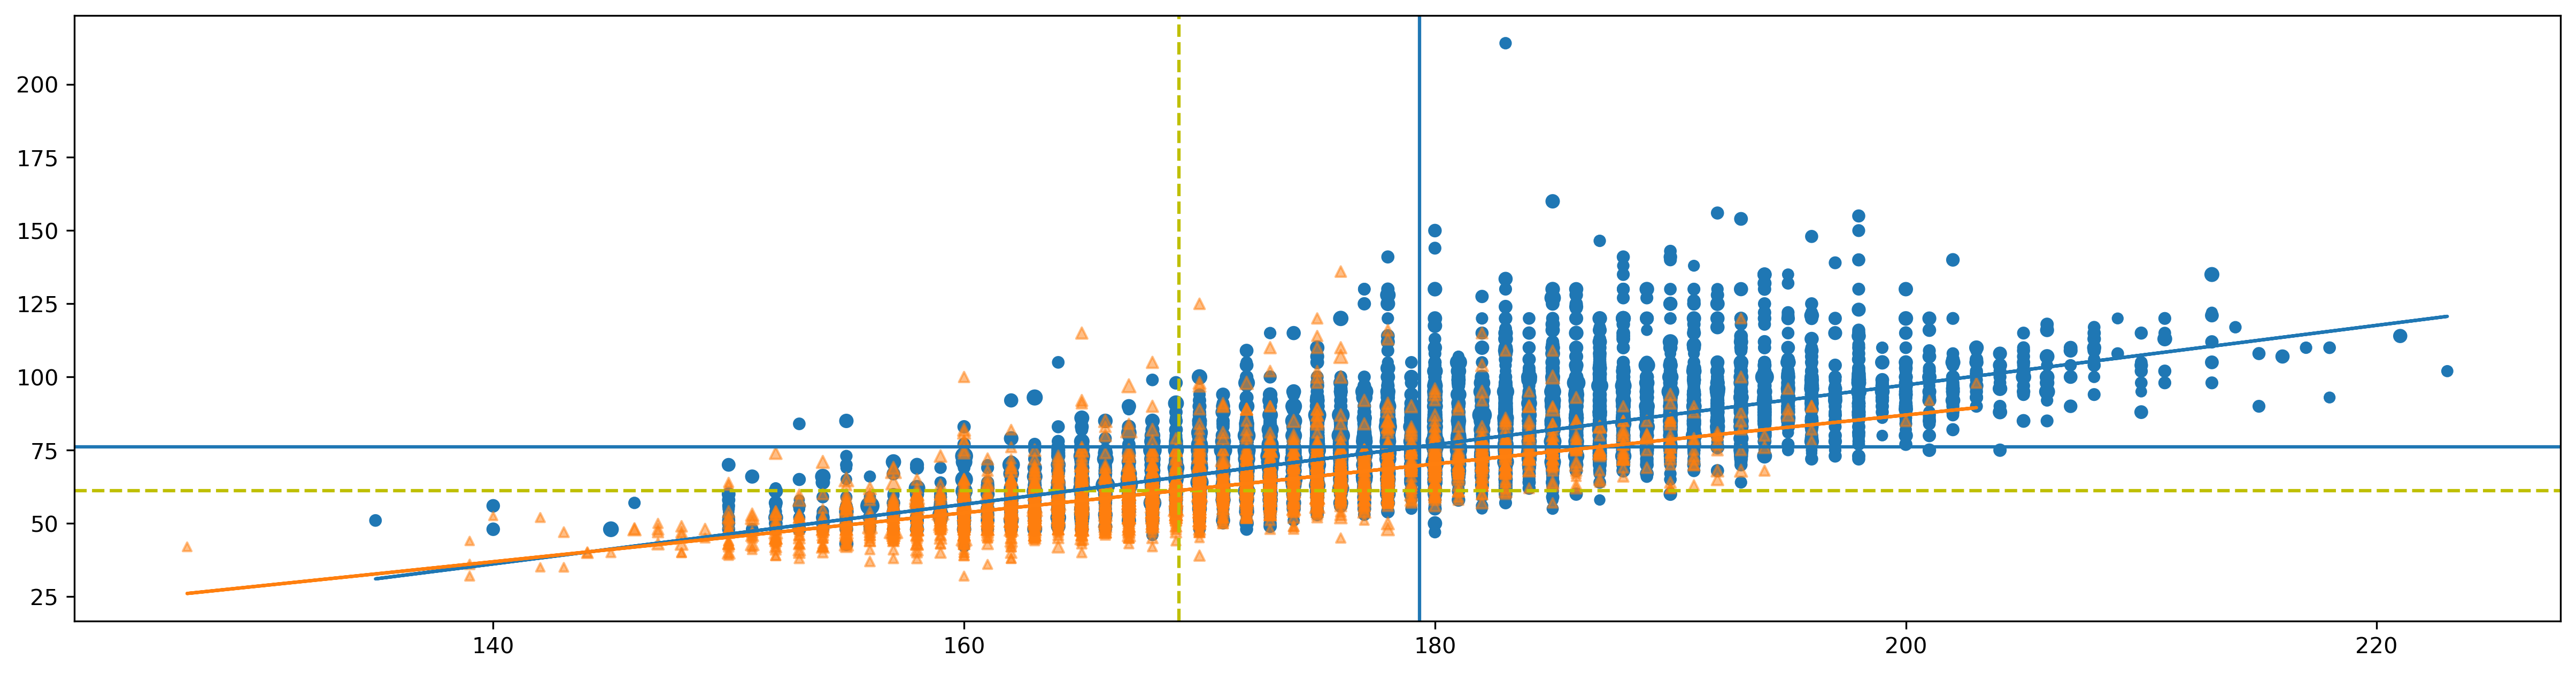

In [78]:
plt.figure(figsize=(20,5),dpi=300)
plt.scatter(man_H, man_W, s=athletes[athletes["Sex"] == "M"]["Age"])
plt.scatter(female_H, female_W, s=athletes[athletes["Sex"] == "F"]["Age"], marker="^", alpha=0.5)
#画平均值线
plt.axhline(man_W_mean)
plt.axvline(man_H_mean)
plt.axhline(female_W_mean,c="y",ls="--")
plt.axvline(female_H_mean,c="y",ls="--")
#画回归线
plt.plot(man_H, predict_man_W)
plt.plot(female_H, predict_female_W)

# 总结
    *线性回归需要导入sklearn模块
        1.创建模型：model = sklearn.learn_model.LinearRegression()
        2.投喂数据：model.fit(x轴数据，y轴数据)，这里的x轴数据需要转为n行一列数组
        3.获得回归方程：给出x轴数值或者数值列表，返回带入回归方程后的y值或y数值列表。yvalues = model.predict(x轴数据)
     *散点图的绘制：plt.scatter(x,y),参数与plt.plot一致